# Vehicle Routing Problem


## A) decision variables, parameters and indices. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df= pd.read_excel('table.xlsx',usecols=range(4))
df.head()

,Node,X - coordinate,Y - coordinate,"Demand, MT"
0,1,50.00,50.00,NaN
1,2,92.00,2.43,17.0
2,3,4.43,86.10,4.0
3,4,70.60,29.60,5.0
4,5,36.30,35.00,10.0


In [3]:
n = 30  # numbre of clients
xc = df['X - coordinate'].values
yc = df['Y - coordinate'].values
q = df['Demand, MT'].fillna(0).values 

In [4]:
#PARAMETERS
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
Q = 90


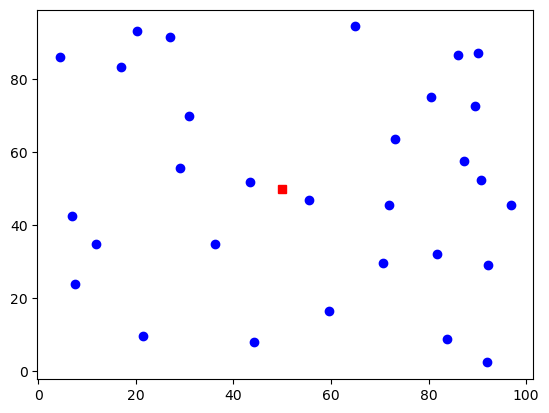

In [5]:
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

## B) The Distance matrix

In [6]:
c = {(i, j): np.sqrt((xc[i]-xc[j])**2 + (yc[i]-yc[j])**2) for i, j in A}

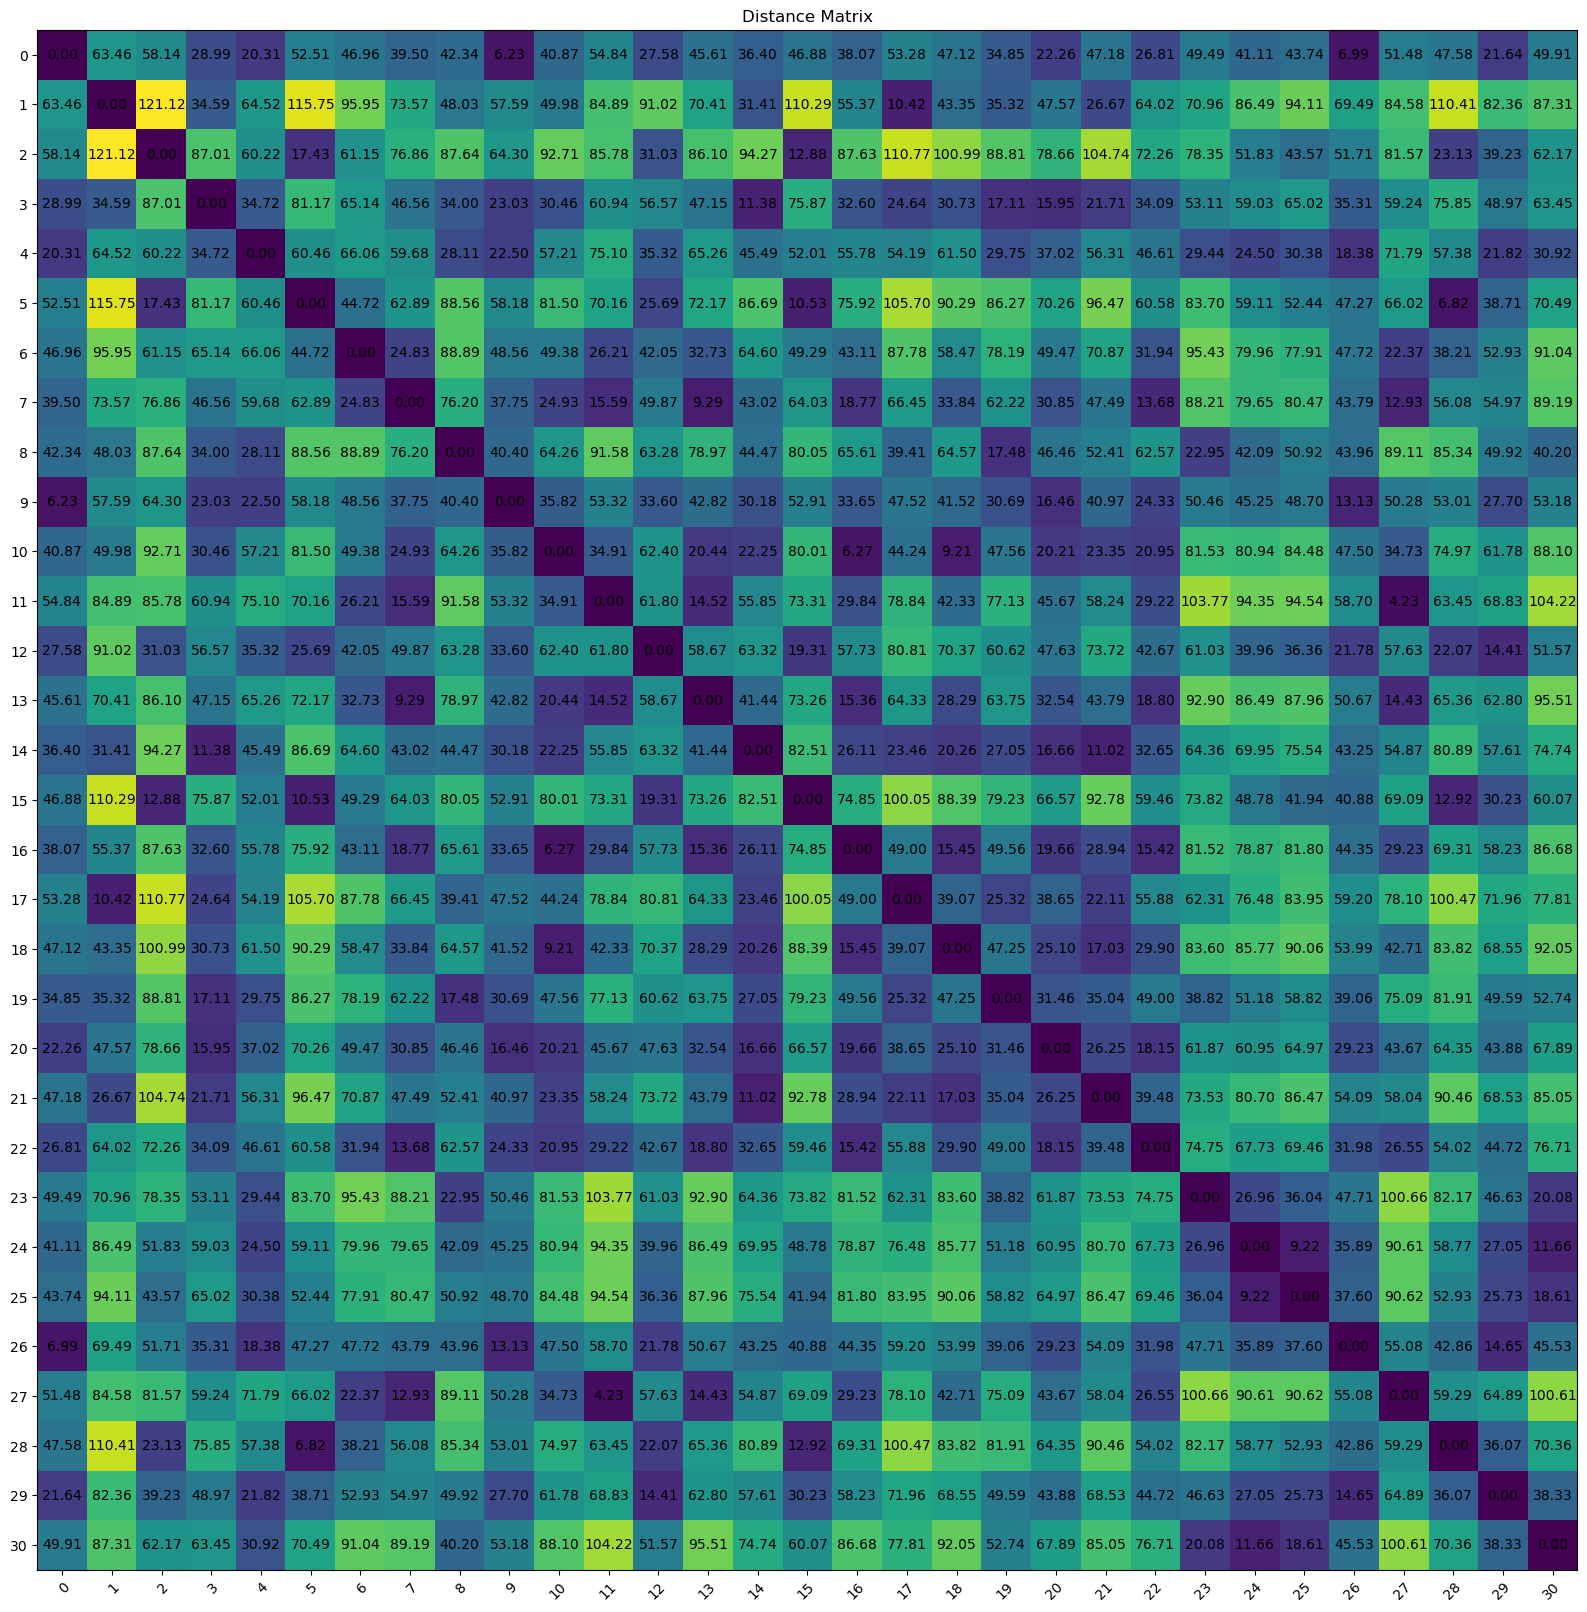

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate distance matrix using Euclidean distance
distance_matrix = np.zeros((len(xc), len(xc)))

for i in range(len(xc)):
    for j in range(len(xc)):
        distance_matrix[i, j] = np.hypot(xc[i] - xc[j], yc[i] - yc[j])

# Create a figure with larger size
fig, ax = plt.subplots(figsize=(40, 20))

im = ax.imshow(distance_matrix, vmin=0, vmax=np.max(distance_matrix))

for i in range(len(xc)):
    for j in range(len(xc)):
        text = ax.text(j, i, f'{distance_matrix[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10)

ax.set_xticks(np.arange(len(xc)))
ax.set_yticks(np.arange(len(xc)))
ax.set_xticklabels(range(len(xc)))
ax.set_yticklabels(range(len(xc)))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.title("Distance Matrix")
plt.show()


## 3)Formulate the Mixed-Integer Linear Programming model

Objective function:

$$\begin{align}
Minimize \(Z = \sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij}x_{ij}\) \\
\text{s.t.} \quad & \sum_{j\in V , j\neq i} x_{ij} = 1  && i \in N \\
& \sum_{i\in V , i\neq j} x_{ij} = 1 && j \in N \\
& \text{if} \ x_{ij}=1 \ \Rightarrow \ u_i + q_j = u_j && i,j \in A : j\neq 0, i\neq 0 \\
& q_i \leq u_i \leq Q && i \in N \\
& x_{ij} \in \{0,1\} && i,j \in A
\end{align}$$

